### Setup

In [1]:
!./venv/bin/pip install kaggle scikit-learn numpy matplotlib seaborn

  Using cached kaggle-1.8.3-py3-none-any.whl.metadata (16 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached black-25.12.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (86 kB)
  Using cached bleach-6.3.0-py3-none-any.whl.metadata (31 kB)
  Using cached kagglesdk-0.1.14-py3-none-any.whl.metadata (13 kB)
  Using cached mypy-1.19.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.2 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached types_requests-2.32.4.20260107-py3-none-any.whl.metadata (2.0 kB)
  Using cached types_tqdm-4.67.0.20250809-py3-none-any.whl.metadata (1.7 kB)
  Using cached urllib3-2.6.3-py3-none-any.whl.metadata (6

In [ ]:
!kaggle datasets download -d neuromusic/avocado-prices

In [ ]:
!unzip avocado-prices.zip

Archive:  avocado-prices.zip
  inflating: avocado.csv             


### Imports

In [150]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from collections import defaultdict

### EDA

In [3]:
avo_df = pd.read_csv("./avocado.csv")
avo_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
avo_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [70]:
avo_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Setting up DataFrame for graphs

In [66]:
month_dict = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', 
                                   '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', 
                                   '11': 'November', '12': 'December'}

graph_df = avo_df.copy()
graph_df['Date'] = pd.to_datetime(graph_df['Date'], format='%Y-%m-%d', errors='coerce')
graph_df['Year'] = graph_df['Date'].dt.year
graph_df['Month'] = graph_df['Date'].dt.month_name()
graph_df['Day'] = graph_df['Date'].dt.day
graph_df['Month'] = graph_df['Month'].replace(month_dict)

#### KDEs

<Axes: xlabel='AveragePrice', ylabel='Density'>

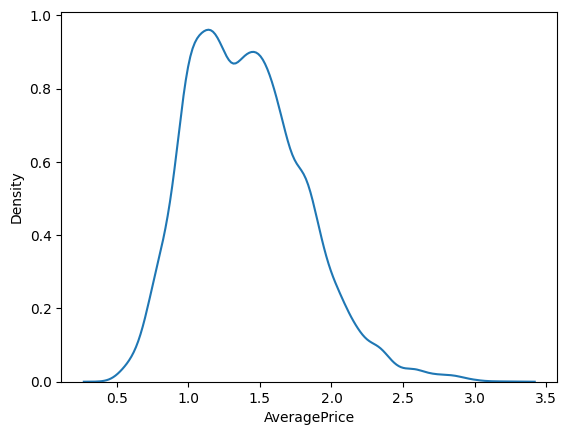

In [ ]:
sns.kdeplot(data=graph_df, x="AveragePrice")

All other columns are extremely skewed, presumably because of outliers or sudden spikes in sales

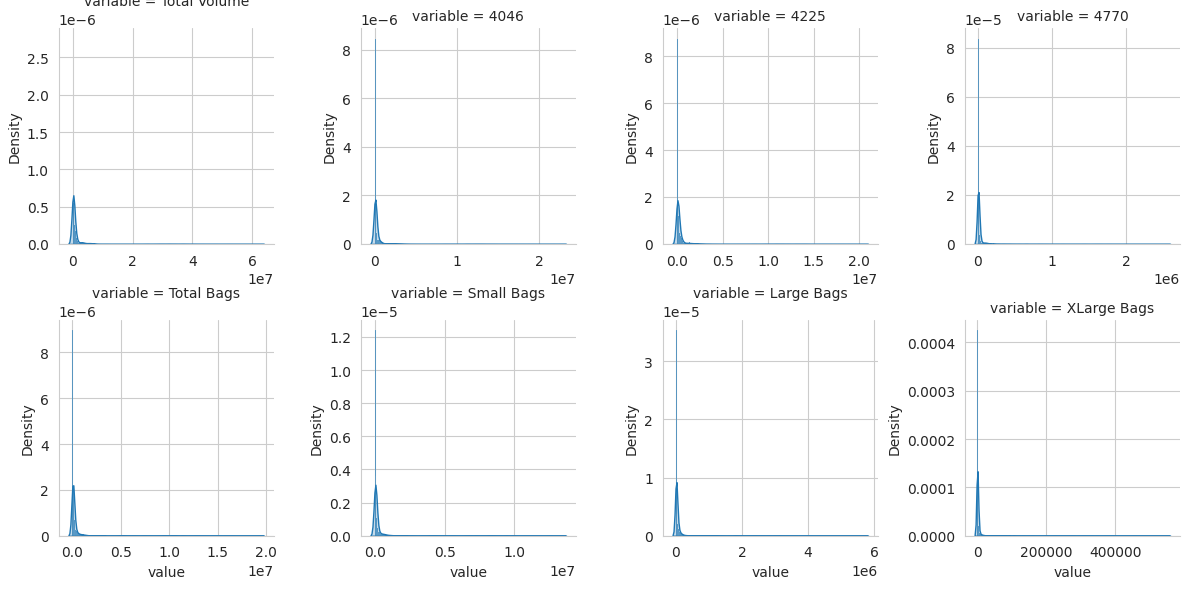

In [ ]:
kde_cols = ["Total Volume", "4046", "4225", "4770", "Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]

with sns.axes_style('whitegrid'):
  nd = pd.melt(graph_df, value_vars=kde_cols)
  n1 = sns.FacetGrid(nd, col='variable', col_wrap=4, sharex=False, sharey=False)

  n1.map(
      sns.histplot,
      'value',
      stat='density',
  )

  n1.map(
      sns.kdeplot,
      'value',
      fill=True
  )

#### Sales by Region
(sorted by median average price, across all years)


Usually, the outliers are much greater than the median, meaning these are sudden spikes in demand.

Index(['HartfordSpringfield', 'NewYork', 'SanFrancisco', 'Northeast',
       'Philadelphia', 'Chicago', 'Sacramento', 'Charlotte', 'Albany',
       'Boston', 'BaltimoreWashington', 'NorthernNewEngland', 'GrandRapids',
       'Plains', 'RaleighGreensboro', 'BuffaloRochester', 'HarrisburgScranton',
       'Jacksonville', 'Orlando', 'Syracuse', 'Tampa', 'MiamiFtLauderdale',
       'Southeast', 'Midsouth', 'Pittsburgh', 'SouthCarolina', 'California',
       'Seattle', 'NewOrleansMobile', 'GreatLakes', 'TotalUS', 'StLouis',
       'Spokane', 'SanDiego', 'Indianapolis', 'LasVegas', 'RichmondNorfolk',
       'Atlanta', 'Louisville', 'Detroit', 'PhoenixTucson', 'Boise',
       'Portland', 'Columbus', 'West', 'Denver', 'Roanoke', 'LosAngeles',
       'WestTexNewMexico', 'Nashville', 'CincinnatiDayton', 'SouthCentral',
       'DallasFtWorth', 'Houston'],
      dtype='object', name='region')


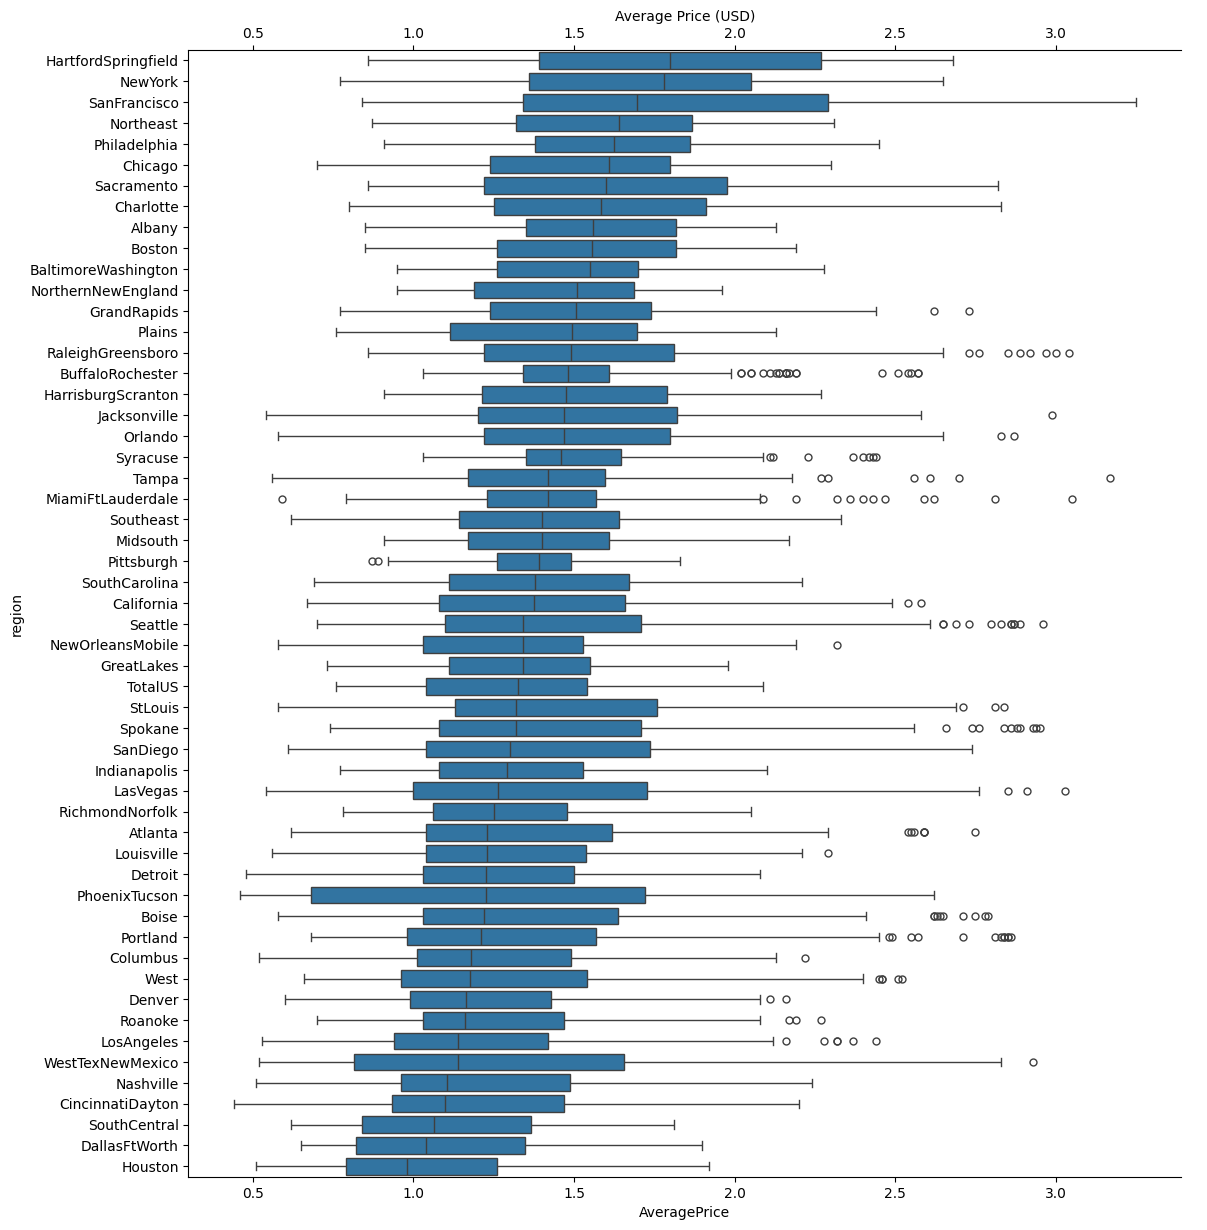

In [81]:
region_order = graph_df \
    .groupby("region")["AveragePrice"] \
    .median() \
    .sort_values(ascending=False) \
    .index

print(region_order)

g = sns.catplot(
    data=graph_df, 
    y="region", 
    x="AveragePrice", 
    kind="box", 
    height=12,
    order=region_order)

# Adding another axis on top for better understanding
for ax in g.axes.flat:
    ax2 = ax.secondary_xaxis('top')
    ax2.set_xlabel('Average Price (USD)')

#### Month vs Average Price

(across all regions, all years)

Organic avocados are consistently ~0.5$ more pricey than conventional ones.

Sales are higher in autumn because of their harvest cycle in South American countries

The most amount of outliers that are way above the median is in autumn, meanwhile late winter - early spring season has inconsistent demand and supply.

<Axes: xlabel='Month', ylabel='AveragePrice'>

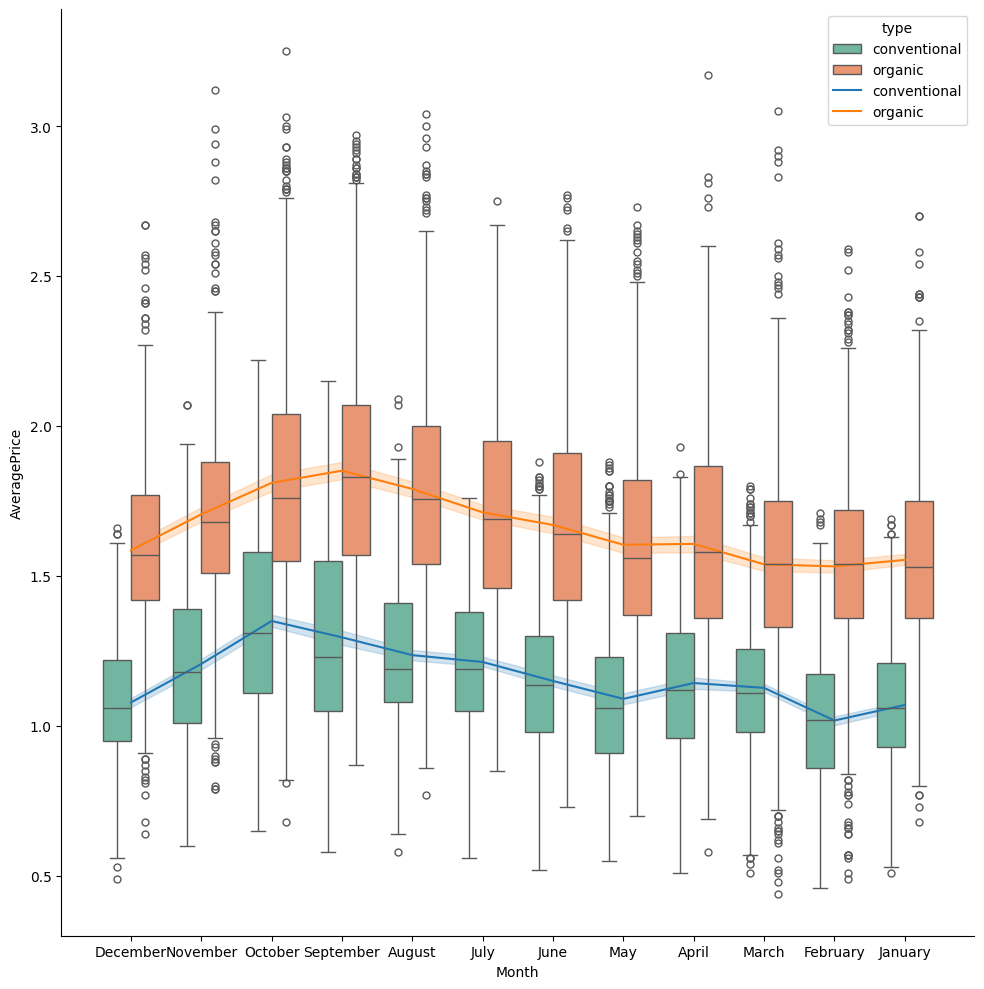

In [ ]:
ax = sns.catplot(x="Month", y="AveragePrice", hue="type", height=10, kind="box", data=graph_df, palette="Set2")
ax._legend.remove()
sns.lineplot(x="Month", y="AveragePrice", data=graph_df, hue="type")

#### Year vs Average Price

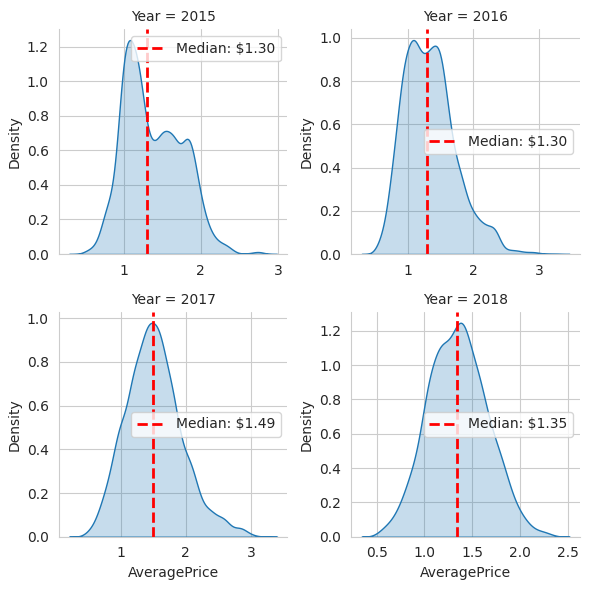

In [42]:
with sns.axes_style('whitegrid'):
  n1 = sns.FacetGrid(graph_df, col='Year', col_wrap=2, sharex=False, sharey=False)

  n1.map(
      sns.kdeplot,
      'AveragePrice',
      fill=True
  )

  years = sorted(graph_df['Year'].unique())
  for ax, year in zip(n1.axes.flat, years):
      median_val = graph_df[graph_df['Year'] == year]['AveragePrice'].median()
      ax.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_val:.2f}')
      ax.legend()

#### Avocado Type vs Total Number 

(across all years, by month)

4046 - Small/Medium

4225 - Large

4770 - Extra Large

4046 and 4225 are sold in same quantities, 4770 is sold much less

                   4046          4225         4770
Month                                             
January    5.775458e+08  6.382339e+08  45624814.40
February   6.163308e+08  6.023089e+08  49066354.62
March      5.606905e+08  5.407105e+08  45812232.88
April      4.418367e+08  4.095634e+08  36369750.85
May        5.291197e+08  5.090589e+08  42907431.32
June       4.360876e+08  3.910112e+08  37462788.08
July       4.418756e+08  4.456088e+08  37076942.91
August     4.080234e+08  3.964364e+08  27539759.83
September  3.350961e+08  3.573228e+08  22583028.60
October    3.264310e+08  3.800468e+08  25976425.56
November   3.228457e+08  3.380390e+08  22417494.95
December   3.512278e+08  3.779350e+08  23965318.13


<Axes: xlabel='Month'>

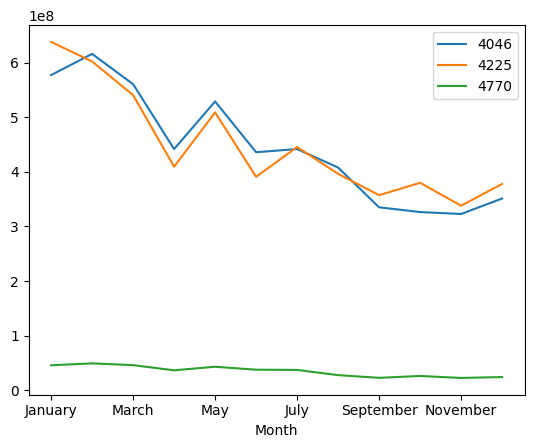

In [ ]:
month_num_map = {v: k for k, v in month_dict.items()}

variant = graph_df[['4046', '4225', '4770']].groupby(graph_df.Month).sum()

variant = variant.reindex(sorted(variant.index, key=lambda x: int(month_num_map.get(x, 13))))

variant.plot(kind='line')

#### Month vs Bags Sold

Number of bags sold grows when the prices are lower, and bags sell less when the prices are higher (inverse proportionality)

<Axes: xlabel='Month'>

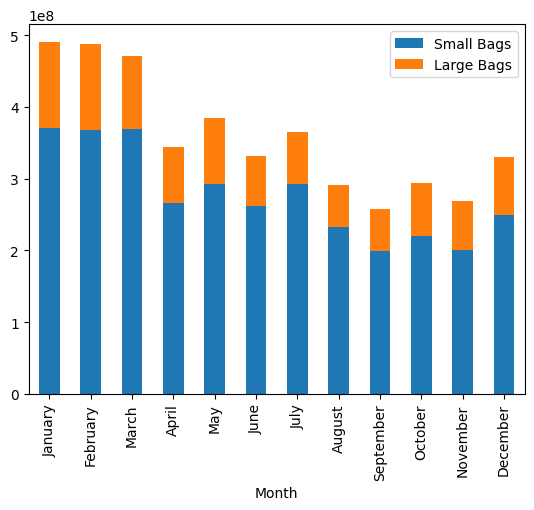

In [79]:
month_num_map = {v: k for k, v in month_dict.items()}

variant = graph_df[["Small Bags", "Large Bags"]].groupby(graph_df.Month).sum()

variant = variant.reindex(sorted(variant.index, key=lambda x: int(month_num_map.get(x, 13))))

variant.plot(kind='bar', stacked=True)

### Feature Engineering

In the context of this homework, we are limited only to 2 features, so finding features with high correlation is very important

In [109]:
clean_df = avo_df.copy()

#### Drop Columns

In [110]:
clean_df = clean_df.drop(clean_df.columns[0], axis=1)

In [111]:
drop_cols = ["region"]

clean_df = clean_df.drop(columns=drop_cols)

#### Convert Categorical

In [112]:
cat_cols = ["type"]

clean_df = pd.get_dummies(clean_df, columns=cat_cols, drop_first=True, dtype=int)

Convert Date

In [113]:
clean_df['Date'] = pd.to_datetime(clean_df['Date'], format='%Y-%m-%d', errors='coerce')
clean_df['Year'] = clean_df['Date'].dt.year
clean_df['Month'] = clean_df['Date'].dt.month
clean_df = clean_df.drop(columns=['Date'])

#### Add Seasons

In [114]:
def get_season(month: int):
    if month <= 2 or month == 12:
        return 0 # Winter
    
    if month >= 3 and month <= 5:
        return 1 # Spring
    
    if month >= 6 and month <= 8:
        return 2 # Summer
    
    if month >= 9 and month <= 11:
        return 3 # Autumn
    

clean_df['Season'] = clean_df['Month'].apply(get_season)

In [10]:
clean_df = pd.get_dummies(clean_df, columns=["Year"], dtype=int)

Two columns with the highest absolute correlation to target column (AveragePrice) are `type_organic` (0.615845) and `Season` (0.224468)

AveragePrice    1.000000
Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
year            0.093197
type_organic    0.615845
Year            0.093197
Month           0.162409
Season          0.224468
Name: AveragePrice, dtype: float64


<Axes: >

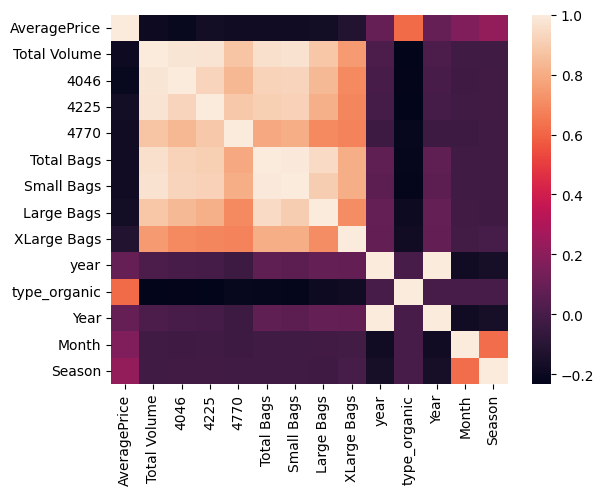

In [116]:
corr = clean_df.corr()
print(corr["AveragePrice"])

sns.heatmap(corr)

Drop Columns with High Correlation to Each Other

In [119]:
drop_corr_cols = ['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

clean_df = clean_df.drop(columns=drop_corr_cols)

#### Final Dataset

In [120]:
clean_df.describe()

,AveragePrice,Total Volume,Total Bags,type_organic,Year,Month,Season
count,18249.000000,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.396392e+05,0.499918,2016.147899,6.177215,1.414214
std,0.402677,3.453545e+06,9.862424e+05,0.500014,0.939938,3.534130,1.122728
min,0.440000,8.456000e+01,0.000000e+00,0.000000,2015.000000,1.000000,0.000000
25%,1.100000,1.083858e+04,5.088640e+03,0.000000,2015.000000,3.000000,0.000000
50%,1.370000,1.073768e+05,3.974383e+04,0.000000,2016.000000,6.000000,1.000000
75%,1.660000,4.329623e+05,1.107834e+05,1.000000,2017.000000,9.000000,2.000000
max,3.250000,6.250565e+07,1.937313e+07,1.000000,2018.000000,12.000000,3.000000


### Decision Boundary

For the clarity of decision boundary visualization, I chose `4046` column instead of `Season`

#### Select Columns for Decision Boundary

In [49]:
decision_cols = ['AveragePrice', '4046']

db_df = clean_df[['type_organic'] + decision_cols]

In [50]:
X_db = clean_df[decision_cols]
y_db = clean_df['type_organic']
X_db

,AveragePrice,4046
0,1.33,1036.74
1,1.35,674.28
2,0.93,794.70
3,1.08,1132.00
4,1.28,941.48
...,...,...
18244,1.63,2046.96
18245,1.71,1191.70
18246,1.87,1191.92
18247,1.93,1527.63


In [80]:
db_scaler = StandardScaler()
X_db = pd.DataFrame(db_scaler.fit_transform(X_db), columns=X_db.columns, index=X_db.index)
X_db.describe()

,AveragePrice,4046
count,18249.000000,18249.000000
mean,0.000000,0.000000
std,1.000027,1.000027
min,-2.398960,-0.231636
25%,-0.759882,-0.230960
50%,-0.089351,-0.224801
75%,0.630850,-0.143869
max,4.579537,17.748155


In [81]:
min1, max1 = X_db['AveragePrice'].min()-1, X_db['AveragePrice'].max()+1
min2, max2 = X_db['4046'].min()-1, X_db['4046'].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


/Users/maxim/Documents/work/sigmoid_hw/07_Decision_Trees/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


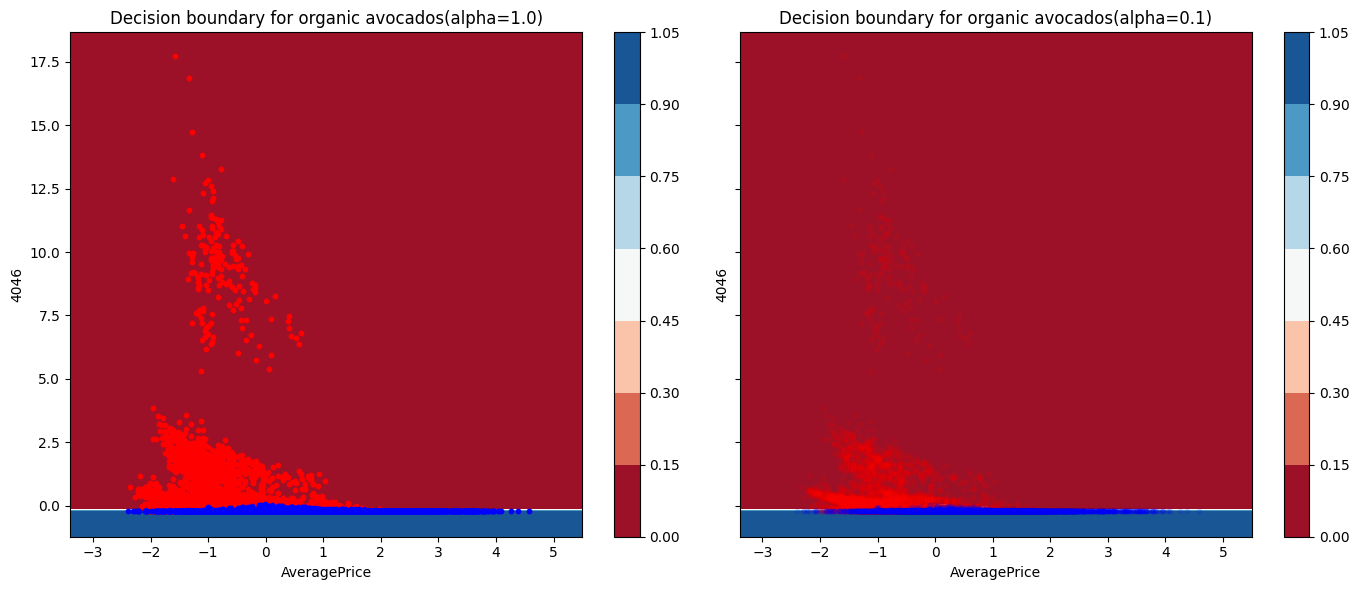

In [84]:
# define and fit the model
model = DecisionTreeClassifier()
model.fit(X_db, y_db)

# predict probabilities on the grid and reshape
yhat = model.predict_proba(grid)[:, 1]  # prob of class 1 (organic)
zz = yhat.reshape(xx.shape)

# make two subplots with different scatter alpha values
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
alphas = [1.0, 0.1]

for ax, a in zip(axes, alphas):
    c = ax.contourf(xx, yy, zz, cmap='RdBu')
    for class_value in range(2):
        row_ix = np.where(y_db == class_value)
        ax.scatter(
            X_db['AveragePrice'].iloc[row_ix],
            X_db['4046'].iloc[row_ix],
            alpha=a,
            s=10,
            color = 'red' if class_value == 0 else 'blue',
            label=f'class {class_value}' if a == 1.0 else None
        )
    ax.set_xlabel("AveragePrice")
    ax.set_ylabel("4046")
    ax.set_title(f"Decision boundary for organic avocados(alpha={a})")
    plt.colorbar(c, ax=ax)

plt.tight_layout()

It can be seen that as that low sales of 4046 avocados usually mean that that the avocado type is organic (the blue lines on the bottom), and that their price varies significantly. High sales volumes for cheaper prices (when AveragePrices < 1 and 4046 > 0.01) means that the avocados are conventional.

There is also quite a big overlap between the avocado types when the sales volumes are low (4046 ~= 0 and AveragePrice < 1), which can be seen in the second subplot due to points with low alpha rate. That is where the classifier is uncertain, making the line white.

### Training

Setting Parameter Grid with necessary parameters

In [127]:
parameters = {
    "max_depth": [4, 8, 16, 32],
    "min_samples_leaf": [1, 2, 4, 8],
    "min_weight_fraction_leaf": [0.0, 0.0001, 0.001],
    "min_samples_split": [4, 8, 16, 32],
    "max_features": [6, 8, 12],
    "max_leaf_nodes": [200, 400, 800, 1200],
    'min_impurity_decrease': [0.0, 0.0001, 0.001]
}

grid = ParameterGrid(parameters)

#### Splitting the Dataset

In [ ]:
X = clean_df.drop(columns=['AveragePrice'])
y = clean_df['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Actual Training

In [ ]:
results = defaultdict(lambda: defaultdict(list))

grid_list = list(grid)
total = len(grid_list)

for idx, params in enumerate(grid_list):
    if idx % 100 == 0:
        print(f"Progress: {idx}/{total} ({100*idx/total:.1f}%)")
    
    model = DecisionTreeRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    for param_name, param_value in params.items():
        results[param_name][str(param_value)].append({
            'mse': mse, 'mae': mae, 'r2': r2
        })

print("Training complete!")

#### Calculate Average Performance

In [ ]:
avg_results = {}
for param_name, values_dict in results.items():
    avg_results[param_name] = {}
    for value, metrics_list in values_dict.items():
        avg_results[param_name][value] = {
            'avg_mse': np.mean([m['mse'] for m in metrics_list]),
            'avg_mae': np.mean([m['mae'] for m in metrics_list]),
            'avg_r2': np.mean([m['r2'] for m in metrics_list]),
            'count': len(metrics_list)
        }

#### Visualize Hyperparameter vs Performance Relation

In [ ]:
def draw_perf_plot(axis, values, labels, label, color):
    axis.plot(range(len(values)), values, marker='o', linewidth=2, color=color)
    axis.set_xticks(range(len(values)))
    axis.set_xticklabels(labels)
    axis.set_ylabel(label)
    axis.set_title(f'{param_name} vs {label}')
    axis.grid(True, alpha=0.3)

- `max_depth` increase the tree depth, deeper => more decisions can be taken => more accurate results, but prone to overfitting

- `min_samples_split` is the minimum number of samples required to split an internal node. Small number tends to overfit, large number prevents learning
- `min_samples_leaf` guarantees a minimal number of leafs, avoiding low-variance, overfit leaf nodes
- `min_weight_fraction_leaf` ensures that leaf nodes contain at least a fraction of the overall sum of the sample weights
- `max_features` controls how many features a node can analyze, same behaviour as with max_depth
- `max_leaf_nodes` sets how many leaf nodes the tree has, too few or too many can be noisy when averaging the final result
- `min_impurity_decrease` controls how much mean decrease in impurity (MDI) we expect from the training process

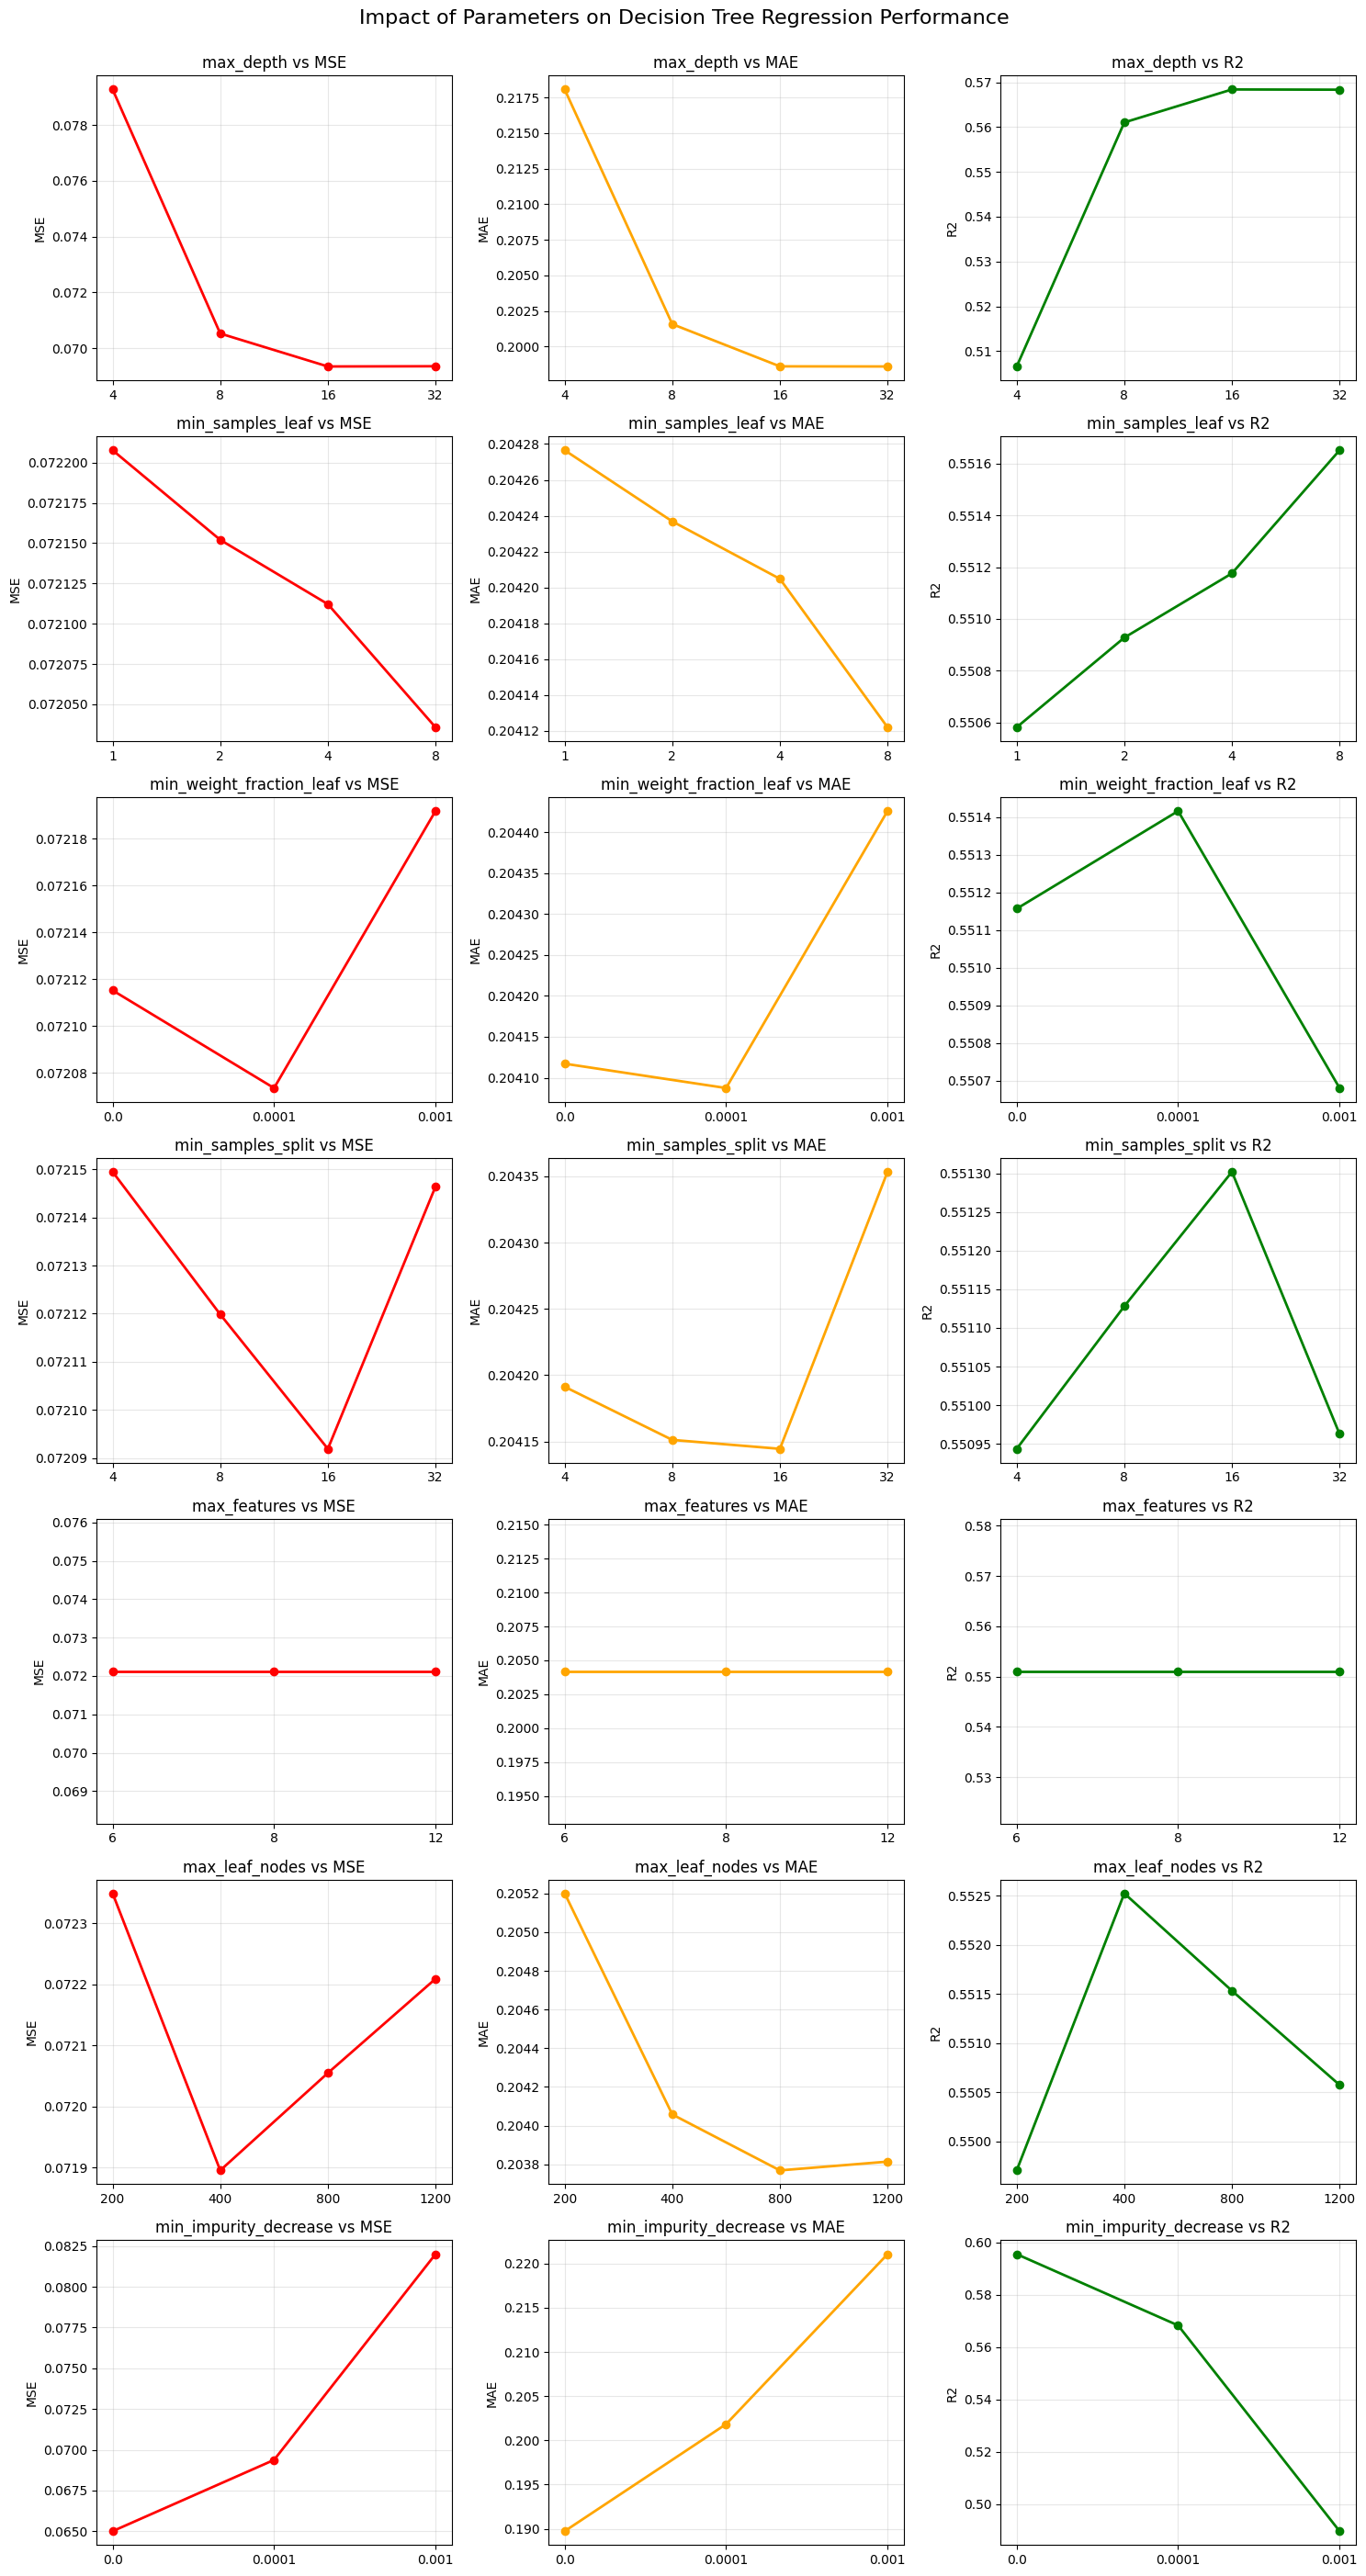

In [141]:
fig, axes = plt.subplots(len(parameters), 3, figsize=(15, 4*len(parameters)))
fig.suptitle('Impact of Parameters on Decision Tree Regression Performance', fontsize=16, y=1.0)

for idx, param_name in enumerate(parameters.keys()):
    values = sorted(avg_results[param_name].keys(), key=lambda x: (x == 'None', float(x) if x != 'None' else float('inf')))
    
    mse_vals = [avg_results[param_name][v]['avg_mse'] for v in values]
    mae_vals = [avg_results[param_name][v]['avg_mae'] for v in values]
    r2_vals = [avg_results[param_name][v]['avg_r2'] for v in values]

    draw_perf_plot(axes[idx, 0], mse_vals, values, 'MSE', 'red')
    draw_perf_plot(axes[idx, 1], mae_vals, values, 'MAE', 'orange')
    draw_perf_plot(axes[idx, 2], r2_vals, values, 'R2', 'green')

plt.tight_layout()


#### Train Best Model

In [148]:
best_params = {}
    
for param_name, values_dict in avg_results.items():
    best_value = None
    best_r2 = -float('inf')
    best_metrics = None
    
    for value, metrics in values_dict.items():
        if metrics['avg_r2'] > best_r2:
            best_r2 = metrics['avg_r2']
            best_value = value
            best_metrics = metrics
    
    best_params[param_name] = float(best_value) if '.' in best_value else int(best_value)


print("Best Parameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

best_model = DecisionTreeRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
best_y_pred = best_model.predict(X_test)

print(f"\nBest MSE: {mean_squared_error(y_test, best_y_pred):.4f}")
print(f"\nBest MAE: {mean_absolute_error(y_test, best_y_pred):.4f}")
print(f"\nBest R2: {r2_score(y_test, best_y_pred):.4f}")

Best Parameters:
  max_depth: 16
  max_features: 6
  max_leaf_nodes: 400
  min_impurity_decrease: 0.0
  min_samples_leaf: 8
  min_samples_split: 16
  min_weight_fraction_leaf: 0.0001

Best MSE: 0.0578

Best MAE: 0.1762

Best R2: 0.6400


#### Visualizing Best Model Tree

Text(0.5, 1.0, 'Decision tree with best parameters')

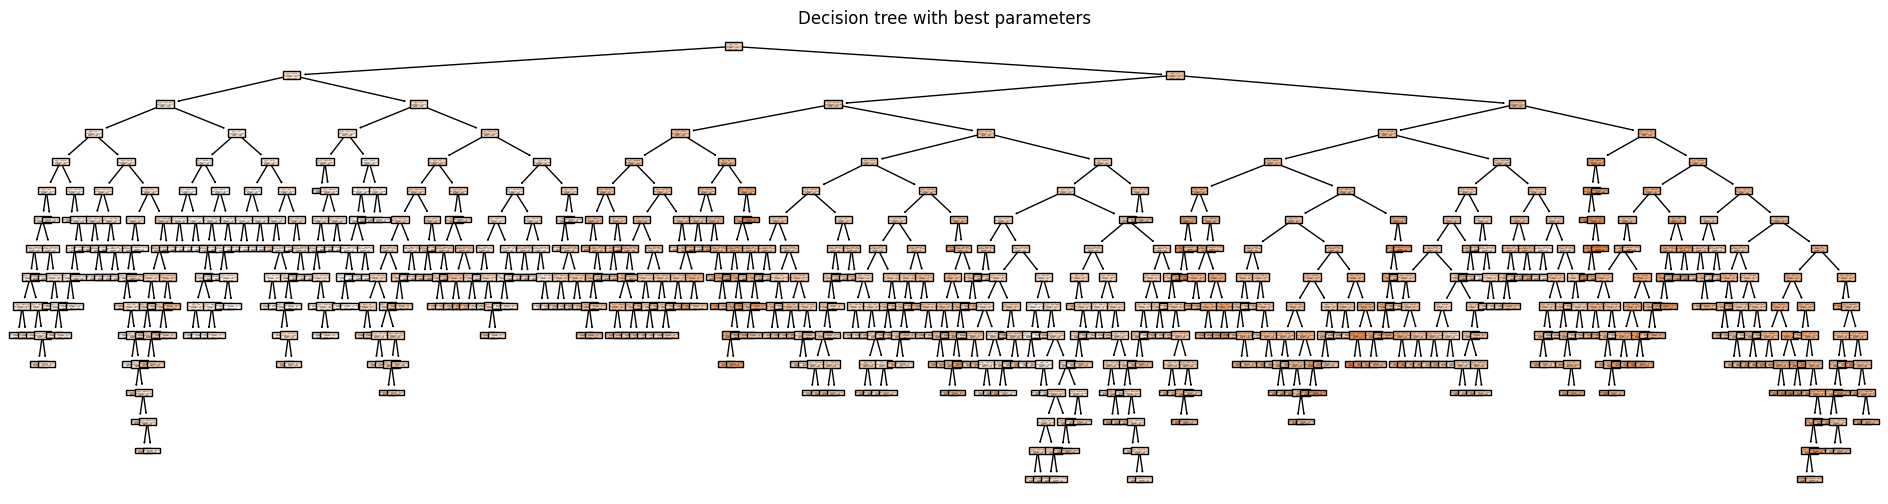

In [ ]:
plt.figure(figsize=(24,6))
plt.title("Decision tree with best parameters")
plot_tree(best_model, filled=True)

x[3] (`type_organic`) and x[5] (`Month`) can be seen twice in the top 3 layers of the decision tree. These are also the features with the highest correlation to the target variable

[Text(0.5, 0.875, 'x[2] <= 0.5\nsquared_error = 0.163\nsamples = 14599\nvalue = 1.405'),
 Text(0.25, 0.625, 'x[3] <= 2016.5\nsquared_error = 0.068\nsamples = 7306\nvalue = 1.155'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 720651.094\nsquared_error = 0.047\nsamples = 4519\nvalue = 1.092'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[5] <= 0.5\nsquared_error = 0.086\nsamples = 2787\nvalue = 1.259'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[5] <= 1.5\nsquared_error = 0.132\nsamples = 7293\nvalue = 1.655'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 3238.13\nsquared_error = 0.108\nsamples = 3924\nvalue = 1.566'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[3] <= 2016.5\nsquared_error = 0.14\nsamples = 3369\nvalue = 1.759'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\

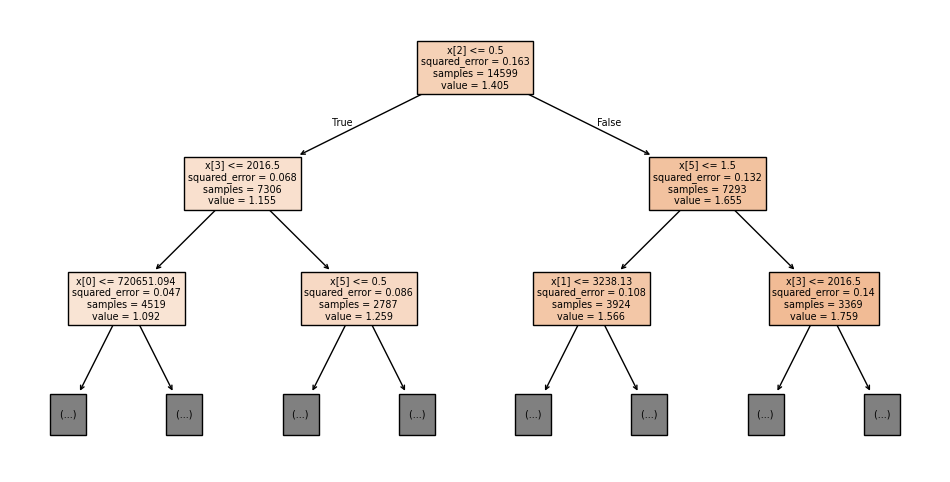

In [156]:
plt.figure(figsize=(12,6))
plt.title("Decision tree with best parameters")
plot_tree(best_model, filled=True, max_depth=2)